In [135]:
from bs4 import BeautifulSoup
import math
import lxml
import os
import json
import re
import snappy
from PorterStemmer import PorterStemmer
import numpy as np
import pandas as pd
import nltk
import rank_bm25
import pickle

path = "AILA_2019_dataset/relevance_judgments_priorcases.txt"

f=open(path,'r')






In [136]:

temp_data1 = f.read()

temp_data = temp_data1.split("\n")

q_map={}

for line in temp_data:
    components=line.split(' ')
    if not components[0] in q_map:
        q_map[components[0]]={}
    q_map[components[0]][components[2]]={}
    q_map[components[0]][components[2]]=int(components[3])

In [137]:
q_map

{'AILA_Q1': {'C168': 0,
  'C382': 0,
  'C428': 0,
  'C949': 0,
  'C2303': 0,
  'C2700': 0,
  'C414': 0,
  'C2727': 0,
  'C357': 0,
  'C45': 0,
  'C2771': 0,
  'C2756': 0,
  'C1294': 0,
  'C861': 0,
  'C2268': 0,
  'C160': 0,
  'C1398': 0,
  'C1200': 0,
  'C517': 0,
  'C1816': 0,
  'C914': 0,
  'C1351': 0,
  'C1655': 0,
  'C1120': 0,
  'C1851': 0,
  'C1086': 0,
  'C2198': 0,
  'C2432': 0,
  'C1867': 0,
  'C48': 0,
  'C776': 0,
  'C41': 0,
  'C925': 0,
  'C2322': 0,
  'C2217': 0,
  'C262': 0,
  'C2684': 0,
  'C684': 0,
  'C431': 0,
  'C2280': 0,
  'C1754': 0,
  'C2132': 0,
  'C1235': 0,
  'C2028': 0,
  'C1779': 0,
  'C791': 0,
  'C2479': 0,
  'C616': 0,
  'C766': 0,
  'C1968': 0,
  'C2914': 0,
  'C553': 0,
  'C2093': 0,
  'C1106': 0,
  'C1417': 0,
  'C2565': 0,
  'C962': 0,
  'C2069': 0,
  'C819': 0,
  'C664': 0,
  'C2352': 0,
  'C1520': 0,
  'C926': 0,
  'C1248': 0,
  'C997': 0,
  'C668': 0,
  'C529': 0,
  'C188': 0,
  'C853': 0,
  'C879': 0,
  'C2536': 0,
  'C2726': 0,
  'C316': 0,
  '

In [139]:
curr = pd.read_pickle(r'bm.pickle')


In [140]:
rel_map={}
for q_id in q_map.keys():
    rel_map[q_id]=0
    for co in q_map[q_id]:
        rel_map[q_id]+=int(q_map[q_id][co])

In [141]:
rel_map

{'AILA_Q1': 2,
 'AILA_Q2': 2,
 'AILA_Q3': 1,
 'AILA_Q4': 1,
 'AILA_Q5': 5,
 'AILA_Q6': 4,
 'AILA_Q7': 1,
 'AILA_Q8': 3,
 'AILA_Q9': 2,
 'AILA_Q10': 3,
 'AILA_Q11': 2,
 'AILA_Q12': 1,
 'AILA_Q13': 3,
 'AILA_Q14': 1,
 'AILA_Q15': 1,
 'AILA_Q16': 2,
 'AILA_Q17': 3,
 'AILA_Q18': 1,
 'AILA_Q19': 4,
 'AILA_Q20': 2,
 'AILA_Q21': 4,
 'AILA_Q22': 2,
 'AILA_Q23': 2,
 'AILA_Q24': 1,
 'AILA_Q25': 6,
 'AILA_Q26': 8,
 'AILA_Q27': 5,
 'AILA_Q28': 2,
 'AILA_Q29': 22,
 'AILA_Q30': 10,
 'AILA_Q31': 2,
 'AILA_Q32': 3,
 'AILA_Q33': 1,
 'AILA_Q34': 13,
 'AILA_Q35': 2,
 'AILA_Q36': 6,
 'AILA_Q37': 3,
 'AILA_Q38': 5,
 'AILA_Q39': 12,
 'AILA_Q40': 2,
 'AILA_Q41': 5,
 'AILA_Q42': 4,
 'AILA_Q43': 3,
 'AILA_Q44': 6,
 'AILA_Q45': 2,
 'AILA_Q46': 9,
 'AILA_Q47': 1,
 'AILA_Q48': 4,
 'AILA_Q49': 4,
 'AILA_Q50': 2}

In [115]:
curr

{'AILA_Q1': [('S173', 59558.525942700224),
  ('S53', 32931.981970312416),
  ('S118', 12601.530395715501),
  ('S122', 141.59821821183738),
  ('S160', -11832.006073538658),
  ('S114', -12663.51402954091),
  ('S110', -13610.25945321664),
  ('S9', -13839.095940469471),
  ('S125', -14222.131037511372),
  ('S3', -14452.116399315883),
  ('S112', -17984.50254678786),
  ('S50', -22820.789912408356),
  ('S79', -23206.819983577338),
  ('S107', -23216.530972470508),
  ('S178', -23889.097957301667),
  ('S155', -24218.26705381588),
  ('S21', -24305.216492013613),
  ('S78', -30878.745798124648),
  ('S131', -36698.55445409634),
  ('S63', -37622.28371341683),
  ('S153', -39290.471844766515),
  ('S68', -42681.23053972883),
  ('S121', -44226.76189131365),
  ('S2', -44385.097508532075),
  ('S23', -49046.70414822587),
  ('S76', -49349.05542711215),
  ('S64', -50025.24774868542),
  ('S103', -50641.169722713414),
  ('S80', -53767.25741326333),
  ('S136', -58718.25425453333),
  ('S4', -64237.29773097816),
  (

In [142]:
#For BM25
pat10=[]
meanp=[]
recip_rank=[]
for i in range(len(curr)):
    df=pd.DataFrame(curr[i])
    q_id='AILA_Q'+str(i+1)
    rel=0
    mAP=0
    num_rel=0
    r_rank=0
    for idx, row in df.iterrows():
        curr_id=row[1]
        rel+=q_map[q_id][curr_id]
        if idx==10:
            break
    for idx, row in df.iterrows():
        curr_id=row[1]
        if q_map[q_id][curr_id]==1:
            num_rel+=1
            if num_rel==1:
                r_rank=1/(idx+1)
            curr1=num_rel/(idx+1)
            mAP+=curr1
    meanp.append(mAP/num_rel)    
    pat10.append(rel/10)
    recip_rank.append(r_rank)

In [147]:
meanp

[0.020497760079641613,
 0.0022775598385354483,
 0.0004816955684007707,
 0.001006036217303823,
 0.005437635808034546,
 0.008752082485564167,
 0.0009578544061302681,
 0.0009476632633452405,
 0.0033317717088764574,
 0.01740651914867943,
 0.04096989966555184,
 0.0016025641025641025,
 0.03684023161366724,
 1.0,
 0.0015479876160990713,
 0.003372058815366597,
 0.024944920440636478,
 1.0,
 0.012986225927619673,
 0.001209351095347675,
 0.29667788610948703,
 0.0008062326450213131,
 0.002748652978010776,
 0.00398406374501992,
 0.032424138895214304,
 0.045757532401791895,
 0.2631453634085213,
 0.0011121915080798258,
 0.07917351093535989,
 0.020666219346214747,
 0.03184772863120144,
 0.0012821750206256385,
 1.0,
 0.05667327667141835,
 0.0015184173244282536,
 0.5139584664860862,
 0.005438217604280954,
 0.005874809727399196,
 0.09868354359302689,
 0.003674190329800717,
 0.005845666405278121,
 0.012943198403556653,
 0.051468893285050214,
 0.05740992511263946,
 0.007709900266427746,
 0.1859810363970883

In [149]:
pat10

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.0,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.1,
 0.0,
 0.1,
 0.0,
 0.0,
 0.0,
 0.1,
 0.2,
 0.0,
 0.3,
 0.0,
 0.0,
 0.2,
 0.0,
 0.0,
 0.0,
 0.1,
 0.1,
 0.0,
 0.3,
 0.0,
 0.3,
 0.0,
 0.0]

In [122]:
#For BERT
pat10=[]
meanp=[]
recip_rank=[]
graph_x=[]
graph_y=[]
for q_id in curr.keys():
    print(q_id)
    df=pd.DataFrame(curr[q_id])
    rel=0
    mAP=0
    num_rel=0
    r_rank=0
    for idx, row in df.iterrows():
        curr_id=row[0]
        rel+=q_map[q_id][curr_id]
        if idx==9:
            break
    for idx, row in df.iterrows():
        curr_id=row[0]
        if q_map[q_id][curr_id]==1:
            num_rel+=1
            if num_rel==1:
                r_rank=1/(idx+1)
            curr1=num_rel/(idx+1)
            mAP+=curr1
    meanp.append(mAP/num_rel)    
    pat10.append(rel/10)
    recip_rank.append(r_rank)

AILA_Q1
AILA_Q2
AILA_Q3
AILA_Q4
AILA_Q5
AILA_Q6
AILA_Q7
AILA_Q8
AILA_Q9
AILA_Q10
AILA_Q11
AILA_Q12
AILA_Q13
AILA_Q14
AILA_Q15
AILA_Q16
AILA_Q17
AILA_Q18
AILA_Q19
AILA_Q20
AILA_Q21
AILA_Q22
AILA_Q23
AILA_Q24
AILA_Q25
AILA_Q26
AILA_Q27
AILA_Q28
AILA_Q29
AILA_Q30
AILA_Q31
AILA_Q32
AILA_Q33
AILA_Q34
AILA_Q35
AILA_Q36
AILA_Q37
AILA_Q38
AILA_Q39
AILA_Q40
AILA_Q41
AILA_Q42
AILA_Q43
AILA_Q44
AILA_Q45
AILA_Q46
AILA_Q47
AILA_Q48
AILA_Q49
AILA_Q50


In [153]:
graph_x=[0.0]
graph_y=[1.0]
q_id='AILA_Q13'
df=pd.DataFrame(curr[12])
num_rel=0

for idx, row in df.iterrows():
    curr_id=row[1]
    if q_map[q_id][curr_id]==1:
        num_rel+=1
    graph_y.append(num_rel/(idx+1))
    graph_x.append(num_rel/rel_map[q_id])
    if num_rel/rel_map[q_id]==1:
        break

In [154]:
import matplotlib.pyplot as plt


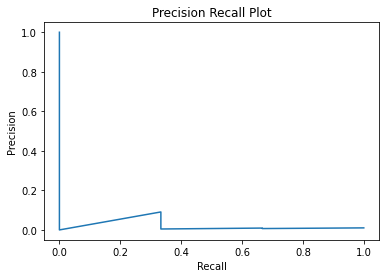

In [155]:
plt.plot(graph_x, graph_y)
 
# naming the x axis
plt.xlabel('Recall')
# naming the y axis
plt.ylabel('Precision')
 
# giving a title to my graph
plt.title('Precision Recall Plot')
 
# function to show the plot
plt.show()

In [77]:
#For BERT
pat10=[]
meanp=[]
recip_rank=[]
for q in curr.keys():
    df=pd.DataFrame(curr[q])
    q_id='AILA_Q'+str(i+1)
    rel=0
    mAP=0
    num_rel=0
    r_rank=0
    for idx, row in df.iterrows():
        curr_id=row[0]
        rel+=q_map[q_id][curr_id]
        if idx==9:
            break
    for idx, row in df.iterrows():
        curr_id=row[0]
        if q_map[q_id][curr_id]==1:
            num_rel+=1
            if num_rel==1:
                r_rank=1/(idx+1)
            curr1=num_rel/(idx+1)
            mAP+=curr1
    meanp.append(mAP/num_rel)    
    pat10.append(rel/10)
    recip_rank.append(r_rank)

In [78]:
pat10

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [34]:
total=0
for num in meanp:
    total+=num
total/50

0.051156039308159096

In [ ]:
rel=0
for idx, row in df.iterrows():
    curr_id=row[0]
    rel+=q_map['AILA_Q1'][curr_id]
    if q_map['AILA_Q1'][curr_id]==1:
        print(idx+1)

In [53]:
mAP=0
num_rel=0
for idx, row in df.iterrows():
    curr_id=row[0]
    if q_map['AILA_Q6'][curr_id]==1:
        num_rel+=1
        curr=num_rel/(idx+1)
        mAP+=curr
mAP=mAP/num_rel
        

In [71]:
df=pd.DataFrame(curr[0])

TypeError: 'float' object is not subscriptable

In [12]:
from transformers import BertConfig, BertModel

In [11]:
top_100={}
for i in range(len(curr)):
    q_id='AILA_Q'+str(i+1)
    top_100[q_id]=curr[i][:100]
    

In [12]:
top_100

{'AILA_Q1': [(1574.527239719679, 'C1651'),
  (1573.8944262000527, 'C2517'),
  (1533.4679135392641, 'C13'),
  (1517.1491148185578, 'C1240'),
  (1513.480771243502, 'C1389'),
  (1510.0171028959783, 'C174'),
  (1509.4190704223827, 'C316'),
  (1501.5560630660173, 'C1837'),
  (1491.290161046147, 'C560'),
  (1481.8714270500254, 'C1483'),
  (1473.0472635450421, 'C1908'),
  (1465.9455513567511, 'C306'),
  (1462.648648786292, 'C128'),
  (1455.319036673022, 'C1234'),
  (1454.7635277315467, 'C162'),
  (1454.3874508176714, 'C2445'),
  (1453.8142242000722, 'C2125'),
  (1451.64422167674, 'C2638'),
  (1446.5488162788354, 'C639'),
  (1439.9573771671455, 'C514'),
  (1437.4357519724683, 'C2544'),
  (1436.4977694471213, 'C1088'),
  (1436.2406936538207, 'C2642'),
  (1435.8810093922043, 'C867'),
  (1435.6790540815155, 'C14'),
  (1434.44061422672, 'C2684'),
  (1433.5621973315567, 'C1672'),
  (1432.414958829599, 'C1300'),
  (1430.8743032054679, 'C1020'),
  (1427.2758147208021, 'C2079'),
  (1425.3098358682378,